On my computer I have 5 different models I have trained, enumerated from 4 to 8 and to which in the following i refer with the name `model`. Here the parameters that definen them.
Common parameter to all of them:

 - `preprocess.py`: **--ngrams --unk "|"  --max_vocab 50000** (I increased the vocab size from 20000 to 50000 in order to get all the words in the german dataset).
 - `train.py`: **--n_neg 5  --weights  --rand_window  --cuda  --loss logistic  --epoch 100** (I tried to train with more epoches but it didn't seem to give improvments in the loss decrease)
 
Parameters that differ between models:

4. `preprocess.py`: **--min_freq 2**
    `train.py`: **--mb 1000 --lr 0.01**
5. `preprocess.py`: **--min_freq 2** 
   `train.py`: **--mb 1000**
6. `preprocess.py`: **--min_freq 1** 
    `train.py`: **--mb 2000**
7. `preprocess.py`: **--min_freq 2**
    `train.py`: **--mb 2000**
8. `preprocess.py`: **--min_freq 1** 
    `train.py`: **--mb 1000**
    
For all the model I trained with **--ngrams** and withoud it.

In [1]:
import pickle
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# THis functions are necessary to extract the loss value from the output files of puhti. Don't worry about them
def ExtractLossFromFile(L, max_epoch):
    epoch = 1
    loss = {'de':[], 'en': [], 'it':[]}
    languages = list(loss.keys())
    kj = 0
    lan = languages[kj]

    for j in range(len(L)):
        if epoch % (max_epoch+1) == 0:
            epoch = 1
            kj+=1
            if kj == 3: break
            else: lan = languages[kj]
        s = f'[Epoch {epoch}]: {max_epoch}'
        if L[j][0:len(s)] == s:
            epoch+=1
            loss[lan].append(float(L[j][-7:-2].split('=')[-1]))
            
    return loss

def SaveLossFile(data_dir, loss, ngrams = True):
    for lan in ['de', 'en', 'it']:
        if ngrams:
            pickle.dump(loss[lan], open(os.path.join(data_dir, lan, 'loss_ngrams.dat'), 'wb'))
        else:
            pickle.dump(loss[lan], open(os.path.join(data_dir, lan, 'loss.dat'), 'wb'))

def GenerateLoss(model, data_dir, max_epoch):
    with open(f'{model}/train.err', 'r') as file:
        L = file.readlines() 
    with open(f'{model}/train.err.ngrams', 'r') as file:
        L_ngrams = file.readlines() 
    
    loss = ExtractLossFromFile(L, max_epoch)
    loss_ngrams = ExtractLossFromFile(L_ngrams, max_epoch)
    
    SaveLossFile(os.path.join(str(model),data_dir), loss, ngrams = False)
    SaveLossFile(os.path.join(str(model),data_dir), loss_ngrams, ngrams = True)

In [3]:
# Functions to plot the losses
def RetrieveLoss(data_dir, lan, first_model, last_model):
    loss = []
    loss_ngrams = []
    for model in range(first_model,last_model+1):
        loss.append(pickle.load(open(os.path.join(str(model), data_dir, lan, 'loss.dat'), 'rb')))
        loss_ngrams.append(pickle.load(open(os.path.join(str(model), data_dir, lan, 'loss_ngrams.dat'), 'rb')))
    return loss, loss_ngrams

# This needs to compare the all models fixed a type of embedding (with ngrams or without)
def PlotLossByLanguage(loss, lan, max_epoch, first_model, last_model, save_dir, ngrams=True):
    fig = plt.figure(figsize=(16,7))
    for model in range(len(loss)):
        plt.plot(list(range(1, max_epoch+1)), loss[model])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(list(range(first_model,last_model+1)))
    plt.grid(True)    
    
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
    if not os.path.isdir(os.path.join(save_dir, lan)):
        os.mkdir(os.path.join(save_dir, lan))
    if ngrams:
        plt.title(f"Training loss with subwords' information - language = {lan}")
        fig.savefig(os.path.join(save_dir, lan, f'Loss_ngrams_{lan}_models_{first_model}-{last_model}.png'))
    else:
        plt.title(f"Training loss without subwords' information - language = {lan}")
        fig.savefig(os.path.join(save_dir, lan, f'Loss_{lan}_models_{first_model}-{last_model}.png'))

# This needs to compare the loss of both embedding fixed a model.
def PlotLossByModel(loss, loss_ngrams, lan, max_epoch, model, save_dir):
    
    fig = plt.figure(figsize=(16,7))
    plt.plot(list(range(1, max_epoch+1)), loss)
    plt.plot(list(range(1, max_epoch+1)), loss_ngrams)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(["no subwords' info", "with subwords' info"])
    plt.grid(True)    
    
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
    if not os.path.isdir(os.path.join(save_dir, lan)):
        os.mkdir(os.path.join(save_dir, lan))
    
    plt.title(f"Training loss - model {model} - language = {lan}")
    fig.savefig(os.path.join(save_dir, lan, f'Loss_{lan}_model_{model}.png'))

In [4]:
first_model = 4
last_model = 8
data_dir = 'data'
max_epoch = 100

In [5]:
for model in range(first_model, last_model+1):
    GenerateLoss(model, data_dir, max_epoch)

In [6]:
languages = ['de', 'en', 'it']
first_model = 5 # I avoid 4 , you'll understand why In the next cells
last_model = 8
data_dir = 'data'
max_epoch = 100
save_dir = 'loss'

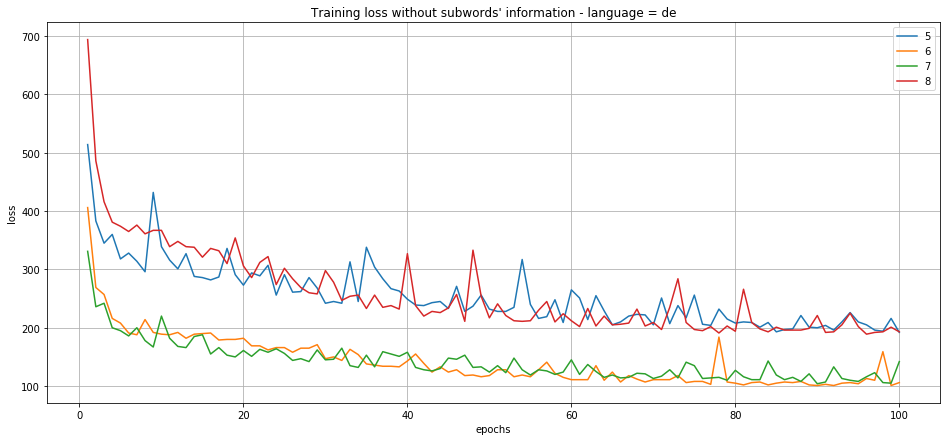

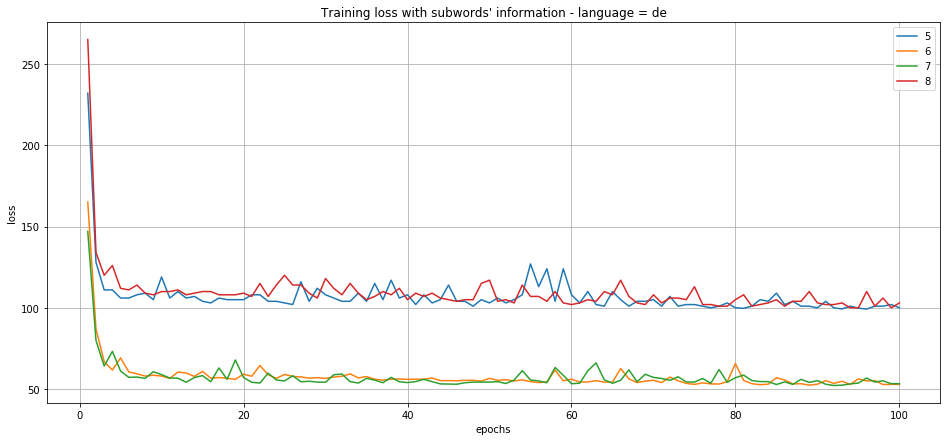

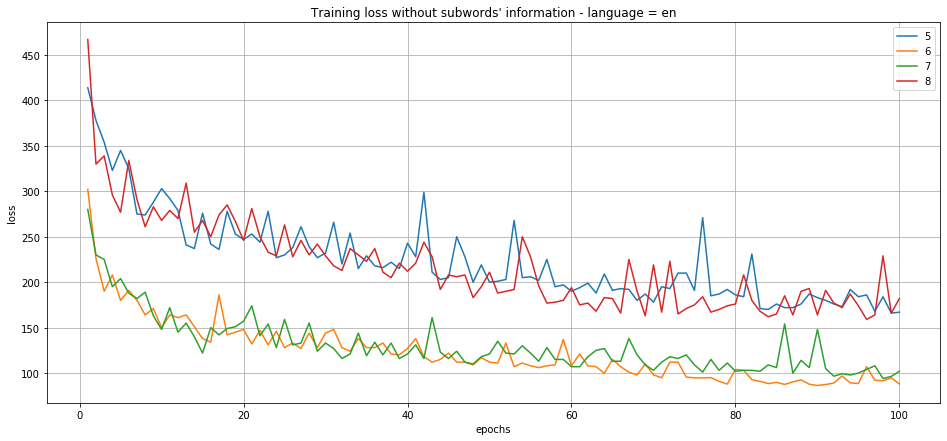

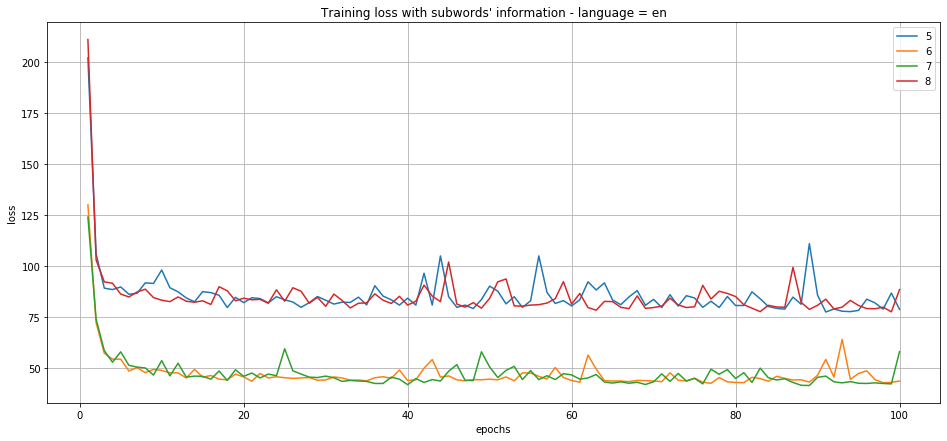

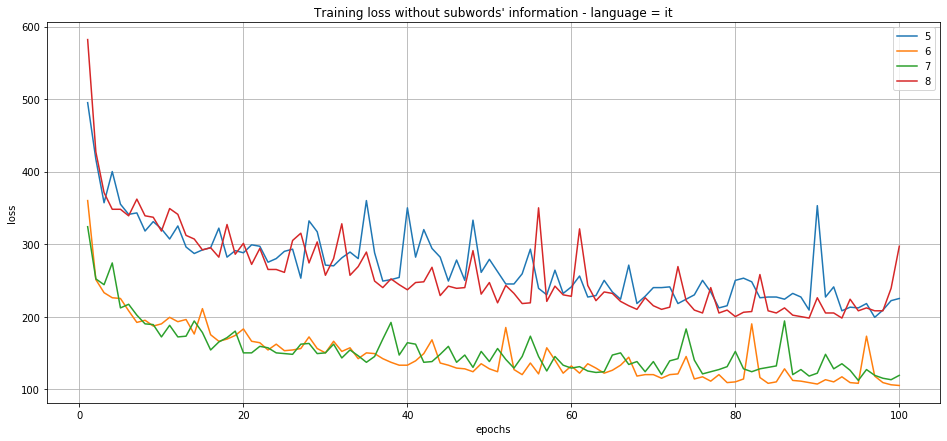

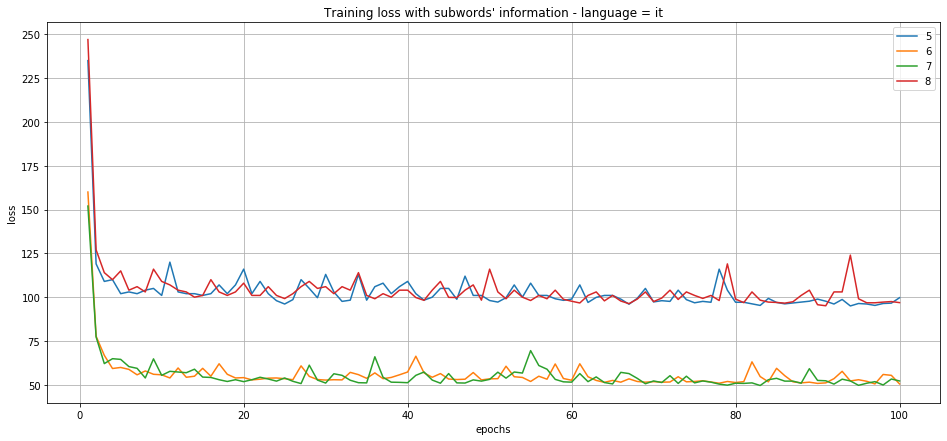

In [7]:
for lan in languages:
    loss, loss_ngrams = RetrieveLoss(data_dir, lan, first_model, last_model)
    PlotLossByLanguage(loss, lan, max_epoch, first_model, last_model, save_dir, ngrams = False)
    PlotLossByLanguage(loss_ngrams, lan, max_epoch, first_model, last_model, save_dir, ngrams = True)

In [8]:
loss, loss_ngrams = RetrieveLoss(data_dir, lan, 4, 8)

In [9]:
first_model = 4
last_model = 8
max_epoch = 100

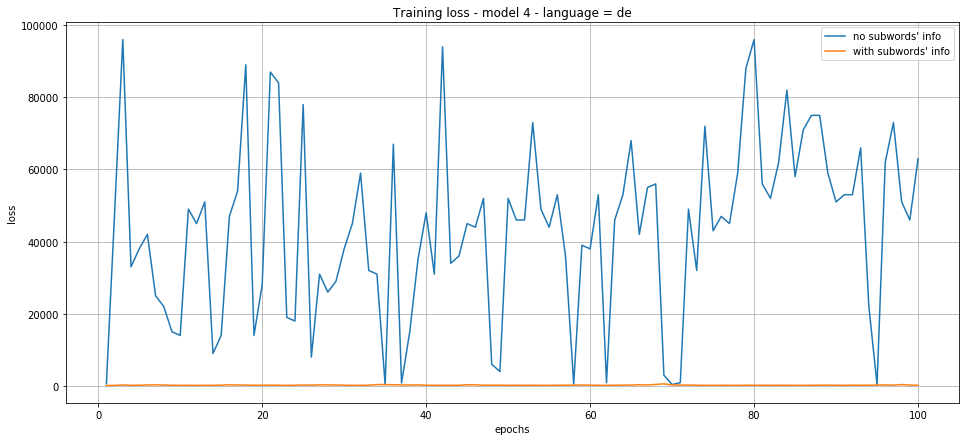

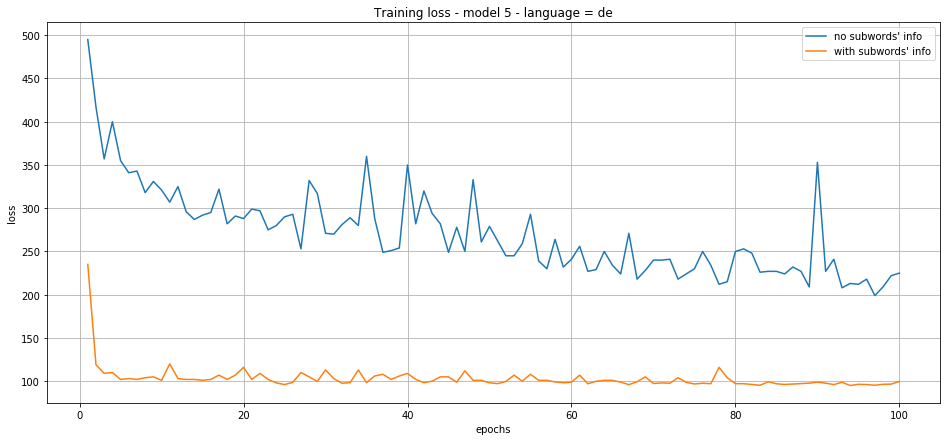

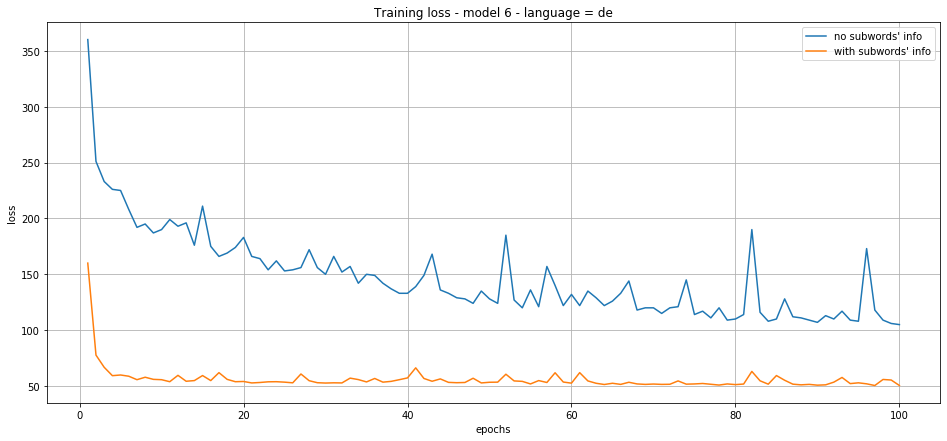

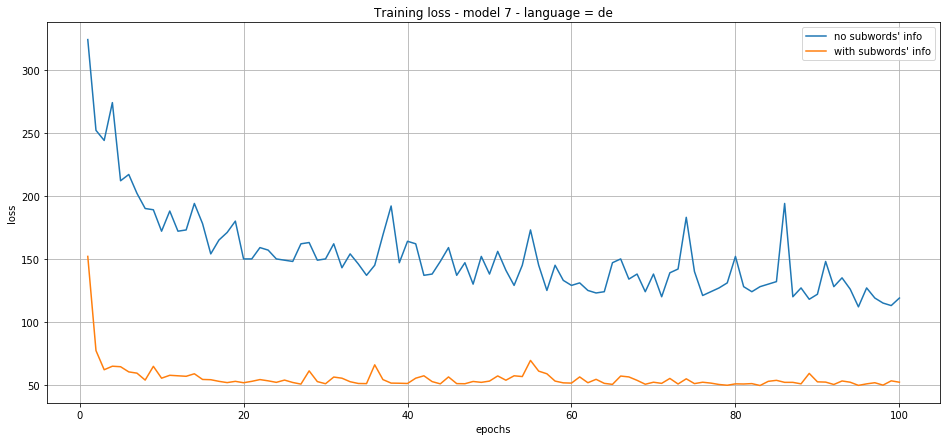

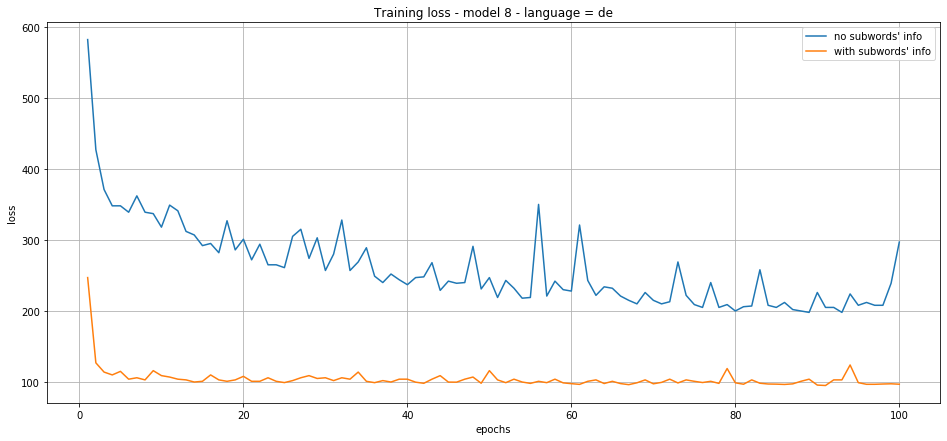

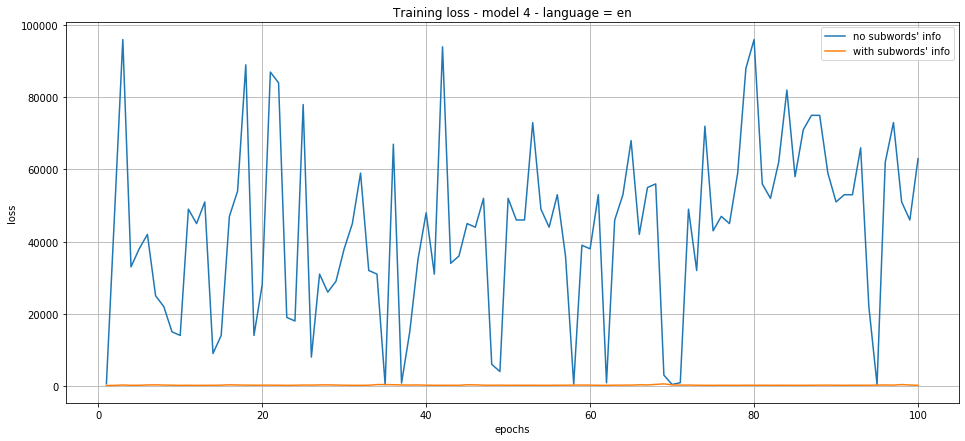

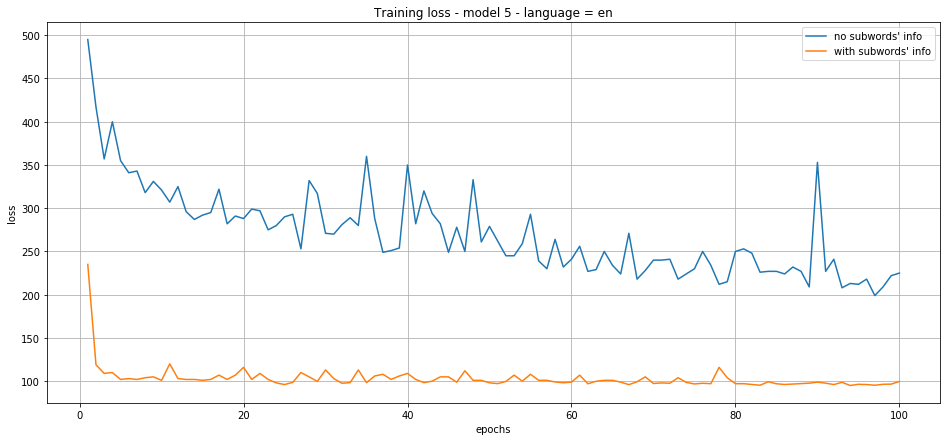

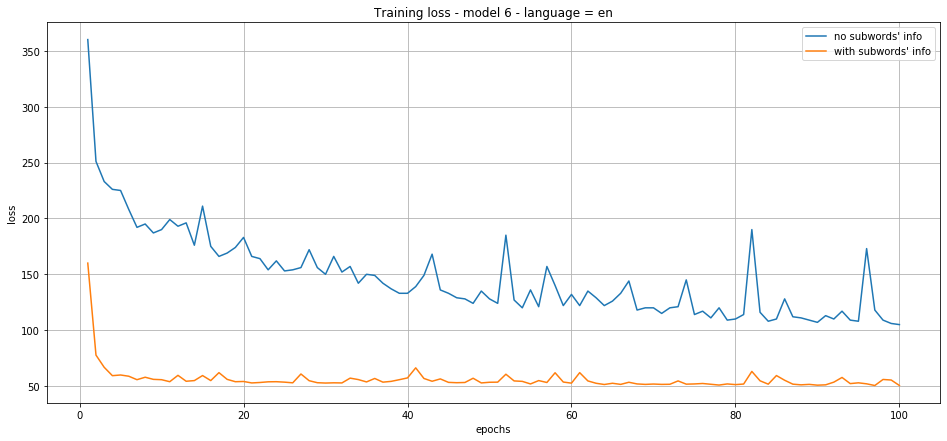

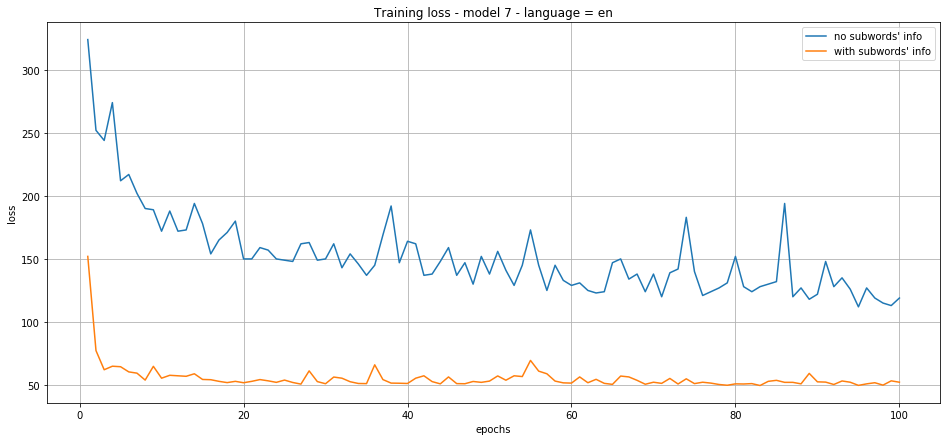

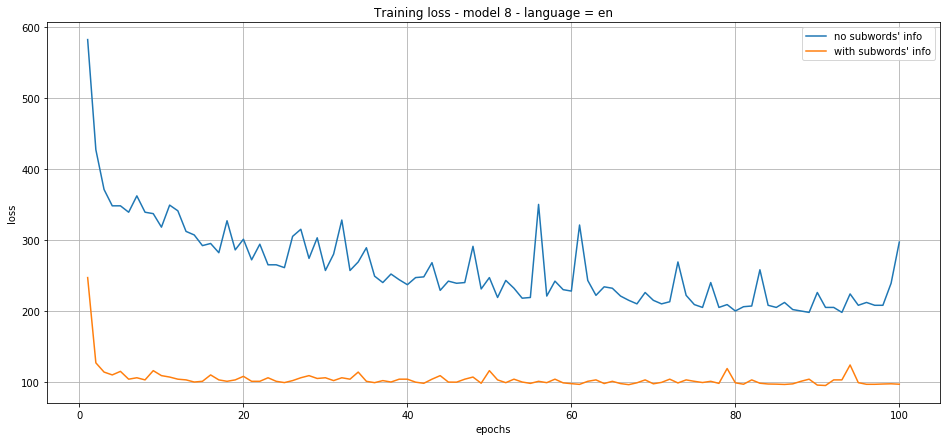

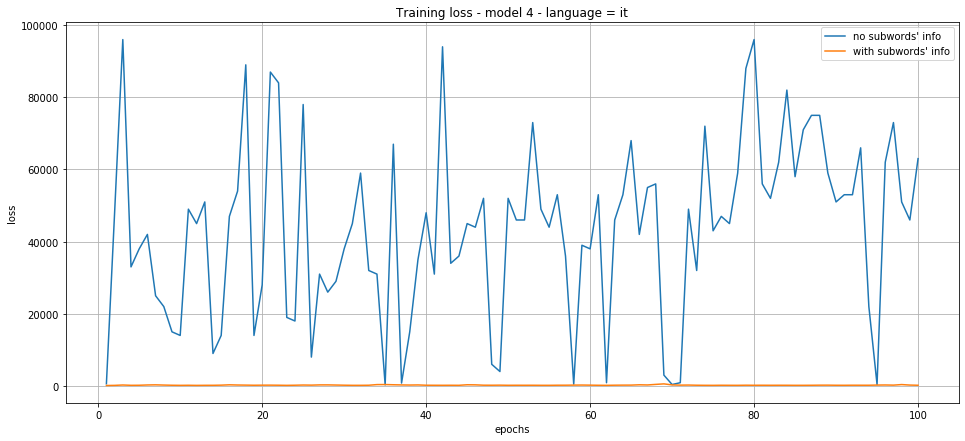

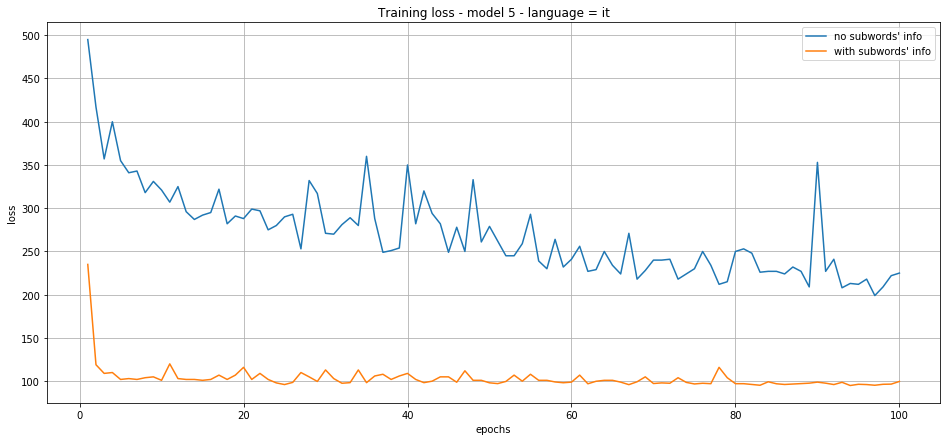

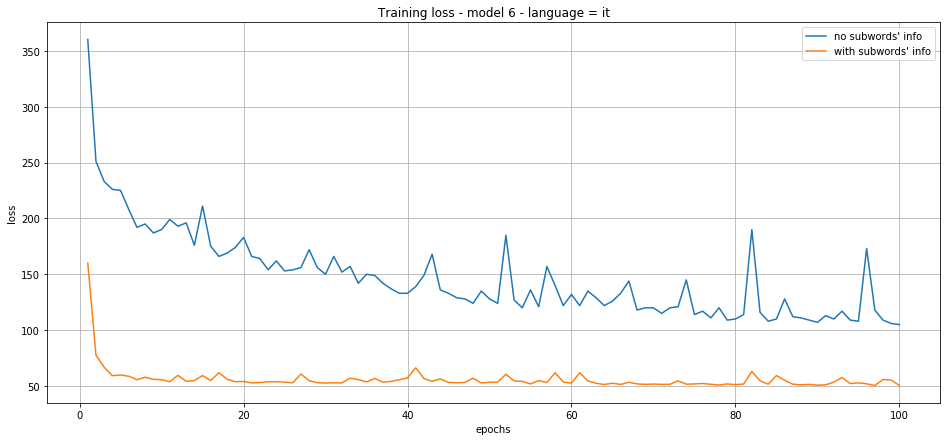

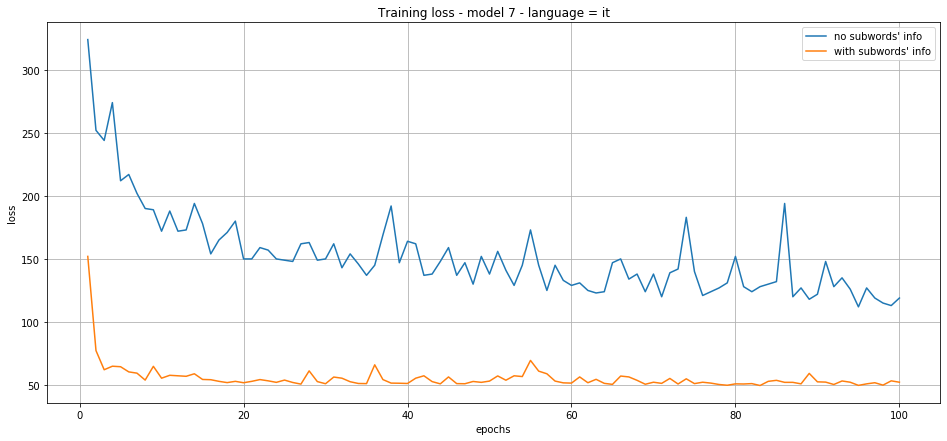

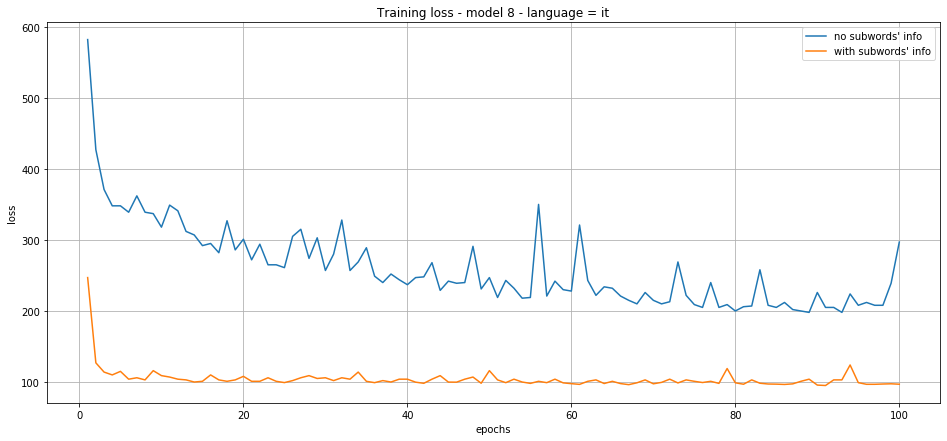

In [10]:
for lan in languages:
    for model in range(last_model+1 - first_model):
        PlotLossByModel(loss[model], loss_ngrams[model], lan, max_epoch, model+first_model, save_dir)

- Model 4 has a crazy behaviour of loss, I don't know why.
- Model 6 is seems to perfom better.